In [40]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# A collection of a set of messy plotting functions for our PLDI paper

In [9]:
import glob
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from benchmark_utils import read_json
from benchmark_utils import violates_pattern
from benchmark_utils import get_traces_at_time
from benchmark_utils import mkdir
from plotting_config import procedures_to_name, colors, markers

%matplotlib inline

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [11]:
def get_result_data(path):
    result_files = glob.glob(path + '/results/*.json')
    return [read_json(filename) for filename in result_files]

In [12]:
def get_all_results(result_data, inf_prog):
    def extract_field(field):
        return [
            result[field]
            for result in result_data  if (result['inf-prog-name'] == inf_prog)
            
        ]
    return extract_field('timing'), extract_field('measurement')

In [13]:
def plot_acc_time_cloud(
        result_data, 
        inf_progs, metric='MSE',
        title_suffix='',
        loc='upper right',
        x_jitter=0,
        y_jitter=0,
        plot_args={},
        xscale='seconds',
        apply_func=None,
        no_labels=False,
    ):
    fig, ax = plt.subplots()
    if xscale == 'seconds':
        xscale_factor = 1.
    elif xscale == 'minutes':
        xscale_factor = 1./60
    else:
        raise ValueError()
    for inf_prog in inf_progs:
        time, accuracy = get_all_results(result_data, inf_prog)
        print len(time)
        if apply_func is not None:
            accuracy = apply_func(accuracy)
        label = procedures_to_name[inf_prog]
        accuracy = np.asarray(accuracy)
        if x_jitter!=0:
            x_jitter_vector = np.random.uniform(-0.5 * x_jitter, +0.5 * x_jitter, accuracy.shape)
        else:
            x_jitter_vector = np.zeros(accuracy.shape)
        if y_jitter!=0:
            y_jitter_vector = np.random.uniform(-0.5 * y_jitter, +0.5 * y_jitter, accuracy.shape)
        else:
            y_jitter_vector = np.zeros(accuracy.shape)
        if no_labels:
            ax.scatter(
                xscale_factor * np.asarray(time) + x_jitter_vector,
                accuracy + y_jitter_vector,
                color=colors[inf_prog], 
                **plot_args
            )
        else:
            ax.scatter(
                xscale_factor * np.asarray(time) + x_jitter_vector,
                accuracy + y_jitter_vector,
                color=colors[inf_prog],
                label=label,
                **plot_args
            )
    ax.set_xlabel('Time (%s)' % (xscale,))
    ax.set_ylabel(metric)
    ax.set_title('Accuracy vs time' + title_suffix)
    #ax.set_ylim(ylims)
    fig.set_size_inches(4,3)
    if not no_labels:
        handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax.legend(handles, labels, **{'loc': 'upper left',  'bbox_to_anchor':(1, 1.05)})
    ax.set_ylabel('Log Joint')
    ax.grid(True)
    return fig, ax

In [14]:
def del_results(path, pattern):
    result_files = glob.glob(path + '/results/*.json')
    for filename in result_files:
        result = read_json(filename)
        if not violates_pattern(result, pattern):
            print '======= Removing: ======='
            print ''
            print json.dumps(result, indent=4)
            print ''
            print ''
            print ''
            os.remove(filename)

## Logistic regression

In [6]:
path = 'logistic-regression/'
log_reg_data = get_result_data(path)

1050
1050


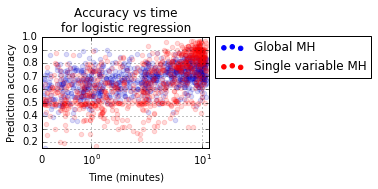

In [7]:
fig, ax = plot_acc_time_cloud(
    log_reg_data,
    [
        'resimulation_mh', # 
        'single_site_mh',
    ],
    loc='upper left',
    #y_jitter=2,
    x_jitter=2,
    xscale='minutes',
    plot_args={'alpha':0.15},
    title_suffix='\nfor logistic regression',
    no_labels=True,
);
ax.set_ylim([0.15, 1.])
ax.set_xscale('symlog')
ax.set_xlim([0, 12])
fig.set_size_inches(3, 2)
ax.set_ylabel('Prediction accuracy')
ax.scatter([], [], color='blue', label='Global MH')
ax.scatter([], [], color='red', label='Single variable MH')
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.06)}
ax.legend(**outside)
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/logistic-regression/time-accuracy.pdf',
#    bbox_inches='tight'
#)

In [8]:
ax.set_ylabel('Data likelihood')
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.06)}
ax.legend(**outside)
fig.set_size_inches(3, 2)
ax.set_ylabel('Prediction accuracy')
ax.set_xlim(0, 600)
ax.set_ylim([0.2, 1])
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/logistic-regression/time-accuracy.pdf',
#    bbox_inches='tight'
#)

(0.2, 1)

## DPMM -- collapsed

In [9]:
path = 'dpmm/'
dpmm = get_result_data(path)

650
650


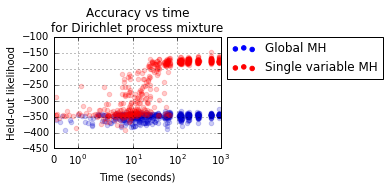

In [10]:
fig, ax = plot_acc_time_cloud(
    dpmm,
    [
        'resimulation_mh', # 
        'single_site_mh',
    ],
    loc='upper left',
    #y_jitter=2,
    x_jitter=20,
    plot_args={'alpha':0.2},
    title_suffix='\nfor Dirichlet process mixture',
    no_labels=True,
    
);
ax.set_ylabel('Held-out likelihood')
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.05)}



#ax.set_xscale('log')
fig.set_size_inches(3, 2)
#ax.set_ylim(-1000, 0)
ax.set_xlim(0, 1000)
#ax.set_xscale('log')
ax.set_xscale('symlog') 

ax.scatter([], [], color='blue', label='Global MH')
ax.scatter([], [], color='red', label='Single variable MH')
ax.legend(**outside)
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/dpmm/time-accuracy.pdf',
#    bbox_inches='tight'
#)

## HMM

In [44]:
ls hmm/results/ | wc -l

2300


In [45]:
run plotting_config.py

In [46]:
path = 'hmm/'
hmm_data = get_result_data(path)

600
600
600


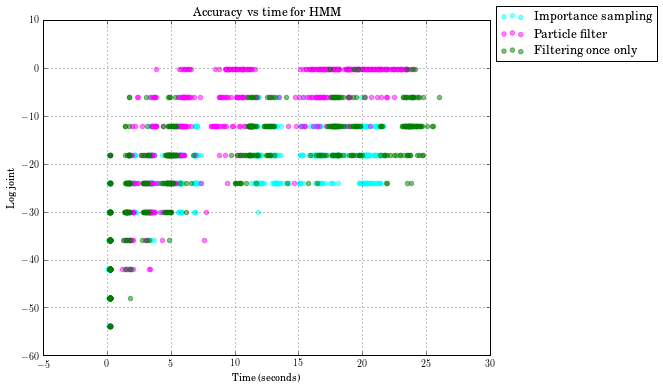

In [47]:
fig, ax = plot_acc_time_cloud(
    hmm_data,
    [
        'sequential_monte_carlo_resampling_at_end_only',
        'sequential_monte_carlo_every_step',
        'sequential_monte_carlo_after_step_5',
    ],
    loc='upper left',
    #y_jitter=2,
    #x_jitter=1,
    plot_args={'alpha':0.5},
    title_suffix=' for HMM',
    
);
ax.set_ylabel('Log joint')
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.06)}
ax.legend(**outside)
fig.set_size_inches(8, 6)
#fig.set_size_inches(3, 2)
#ax.set_xlim(0, 30)
#ax.set_xscale('log')
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/hmm/time-accuracy.pdf',
#    bbox_inches='tight'
#)
#ax.set_yscale('symlog')
#ax.set_ylim(-100, 1)

In [48]:
def get_all_results_sorted_iters(result_data, inf_prog):
    def extract_field(field):
        return [
            result[field]
            for result in result_data  if (result['inf-prog-name'] == inf_prog)
            
        ]
    iterations = np.unique(extract_field('number-traces'))
    def extract_field_given_iterations(field, iteration):
        return [
            result[field]
            for result in result_data  if ((result['inf-prog-name'] == inf_prog) and (result['number-traces'] == iteration))
            
        ]
    print iterations
    timings      = [ extract_field_given_iterations('timing', iters) for iters in iterations]
    measurements = [ extract_field_given_iterations('log_joint', iters) for iters in iterations]
    return np.asarray(timings), np.asarray(measurements)

In [49]:
def plot_acc_time_bands(
        result_data, 
        inf_progs, metric='MSE',
        title_suffix='',
        loc='upper right',
        x_jitter=0,
        y_jitter=0,
        plot_args={},
        xscale='seconds',
        apply_func=None,
        no_labels=False,
    ):
    fig, ax = plt.subplots()
    if xscale == 'seconds':
        xscale_factor = 1.
    elif xscale == 'minutes':
        xscale_factor = 1./60
    else:
        raise ValueError()
    for inf_prog in inf_progs:
        time, accuracy = get_all_results_sorted_iters(result_data, inf_prog)
        if apply_func is not None:
            accuracy = apply_func(accuracy)
        label = procedures_to_name[inf_prog]
        accuracy = np.asarray(accuracy)
        if no_labels:
            ax.scatter(
                xscale_factor * np.asarray(time) + x_jitter_vector,
                accuracy + y_jitter_vector,
                color=colors[inf_prog], 
                **plot_args
            )
        else:
            med = np.median(accuracy, axis=1)
            datarange = 0.75 * np.ptp(accuracy, axis=1)
            t = np.median(xscale_factor * np.asarray(time), axis=1)
            ax.plot(
                np.median(xscale_factor * np.asarray(time), axis=1),
                np.median(accuracy, axis=1),
                color=colors[inf_prog],
                label=label,
                **plot_args
            )
            ax.fill_between(t, (med-datarange).tolist(), (med+datarange).tolist(), alpha=0.1, 
                            edgecolor=colors[inf_prog], facecolor=colors[inf_prog]
            )
    ax.set_xlabel('Time (%s)' % (xscale,))
    ax.set_ylabel(metric)
    ax.set_title('Accuracy vs time' + title_suffix)
    #ax.set_ylim(ylims)
    fig.set_size_inches(4,3)
    if not no_labels:
        handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax.legend(handles, labels, **{'loc': 'upper left',  'bbox_to_anchor':(1, 1.05)})
    ax.set_ylabel('Log Joint')
    ax.grid(True)
    return fig, ax

[  1  15  30  60  80 100]
[ 1  3  5  8 13 16]
[ 1  7 15 35 55 70]


(0, 20)

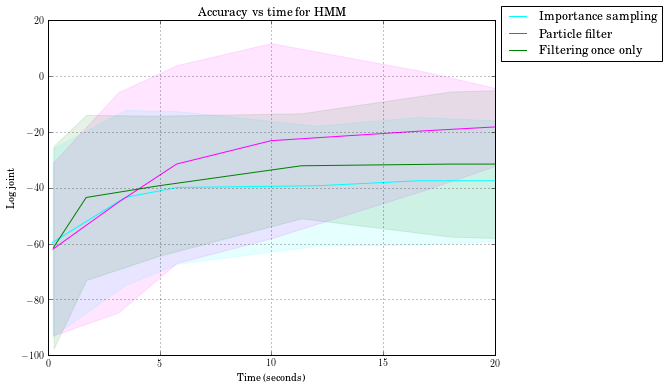

In [50]:
fig, ax = plot_acc_time_bands(
    hmm_data,
    [
        'sequential_monte_carlo_resampling_at_end_only',
        'sequential_monte_carlo_every_step',
        'sequential_monte_carlo_after_step_5',
    ],
    loc='upper left',
    y_jitter=2,
    #x_jitter=1,
    plot_args={'alpha':1},
    title_suffix=' for HMM',
    
);
ax.set_ylabel('Log joint')
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.06)}
ax.legend(**outside)
fig.set_size_inches(8, 6)
ax.set_xlim(0,20)

In [51]:
cd hmm

/home/ulli/probcomp3/Venturecxx/benchmarks/inference-benchmarks/hmm


In [52]:
run plugins.py

In [53]:
cd ..

/home/ulli/probcomp3/Venturecxx/benchmarks/inference-benchmarks


In [54]:
 obs = [0, 0, 0, 1, 1, 1, 1, 3, 3, 3]
filter_dist = get_filtering_dist(obs)

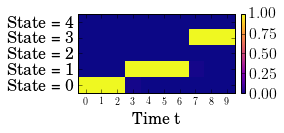

In [55]:
w = 3
h = 2
fig, ax = plot_marginal(
    filter_dist,
    'Filtering distribution'
)
fig.set_size_inches(w,h)
fig.savefig(
    '/home/ulli/git_repos/Venture_semantics/figs/hmm/ground-truth.pdf',
    bbox_inches='tight'
)

In [56]:
inf_progs = [
    'sequential_monte_carlo_after_step_5',
    'sequential_monte_carlo_resampling_at_end_only',
    'sequential_monte_carlo_every_step',
]

In [57]:
inf_prog = inf_progs[0]

In [58]:
def get_latents(result_data, inf_prog):
    def extract_field(field):
        return [
            result[field]
            for result in result_data  if (result['inf-prog-name'] == inf_prog) and \
                (result['timing'] > 15) 
            
        ]
    latents =  extract_field('latents')
    print np.asarray(latents).shape
    return latents

(200, 10)
(199, 10)
(195, 10)


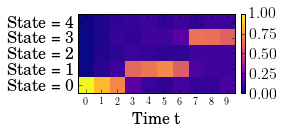

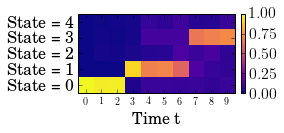

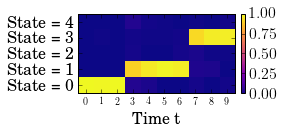

In [60]:
inf_prog = 'sequential_monte_carlo_resampling_at_end_only'
fig, ax = plot_marginal_given_data(
    get_latents(hmm_data, inf_prog),
    procedures_to_name[inf_prog]
)
fig.set_size_inches(w,h)
fig.savefig(
    '/home/ulli/git_repos/Venture_semantics/figs/hmm/traces--importance-sampling.pdf',
    bbox_inches='tight'
)
inf_prog = 'sequential_monte_carlo_after_step_5'
fig, ax = plot_marginal_given_data(
    get_latents(hmm_data, inf_prog),
    procedures_to_name[inf_prog]
)
fig.set_size_inches(w,h)
fig.savefig(
    '/home/ulli/git_repos/Venture_semantics/figs/hmm/traces--smc-at-step5.pdf',
    bbox_inches='tight'
)
inf_prog = 'sequential_monte_carlo_every_step'
fig, ax = plot_marginal_given_data(
    get_latents(hmm_data, inf_prog),
    procedures_to_name[inf_prog]
)
fig.set_size_inches(w,h)
fig.savefig(
    '/home/ulli/git_repos/Venture_semantics/figs/hmm/traces--smc.pdf',
    bbox_inches='tight'
)

# Lin reg with outlierse

In [27]:
run plotting_config.py

In [28]:
ls linear-regression-with-outliers/results/ | wc -l

90


In [29]:
path = 'linear-regression-with-outliers/'
lin_reg_data_new = get_result_data(path)

30
30
30


(4.8, 6)

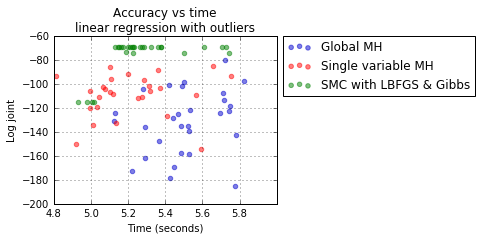

In [30]:
fig, ax = plot_acc_time_cloud(
    lin_reg_data_new,
    [
        'resimulation_mh',
        'single_site_mh',
        #'single_site_gibbs',
        'sequential_monte_carlo_lbfgs_gibbs',
    ],
    loc=outside,
    plot_args={'alpha':0.5},
    title_suffix='\nlinear regression with outliers',
    
);


outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.04)}
ax.legend(**outside)
fig.set_size_inches(4, 3)
#ax.legend(outside)
ax.set_ylabel('Log joint')
#ax.set_yscale('symlog')
ax.set_ylim(-200, -60)
ax.set_xlim(4.8, 6)
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/linear-regression/time-accuracy.pdf',
#    bbox_inches='tight'
#)

In [31]:
def get_all_results_time_intervall(result_data, inf_prog, min_t=5, max_t=5.2):
    def extract_field(field):
        return [
            result[field]
            for result in result_data  if (result['inf-prog-name'] == inf_prog) and\
                (result['timing'] > min_t)  and (result['timing'] < max_t)
        ]
    def extract_parameters(parameter):
        return [
            result['learned-parameters'][parameter]
            for result in result_data  if (result['inf-prog-name'] == inf_prog) and\
                (result['timing'] > min_t)  and (result['timing'] < max_t)
        ]
    return  extract_field('measurement'), extract_parameters('slope'),\
        extract_parameters('intercept'), extract_parameters('inlier_noise'),\
        extract_parameters('outlier_noise'),extract_parameters('outliers')

In [32]:
cd linear-regression-with-outliers/

/home/ulli/probcomp3/Venturecxx/benchmarks/inference-benchmarks/linear-regression-with-outliers


In [33]:
run plugins.py

In [34]:
data_xs = np.loadtxt('training_xs.csv')
data_ys = np.loadtxt('training_ys.csv')

In [35]:
cd ..

/home/ulli/probcomp3/Venturecxx/benchmarks/inference-benchmarks


In [36]:
def plot_params(posterior, prefix):
    fig, ax = plot_parameter_dist(
        posterior[0,:], '%s: posterior on slope' % prefix, 'slope'
    )
    fig, ax = plot_parameter_dist(
        posterior[:,1], '%s: posterior intercept' % prefix, 'intercept'
    )
    fig, ax = plot_parameter_dist(
        posterior[:,2], '%s: posterior on inlier noise', 'inlier_noise'
    )

In [37]:
inf_progs = [
    'resimulation_mh',
    'single_site_mh',
    'sequential_monte_carlo_lbfgs_gibbs',
]

[ 3  6  9 14]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 19


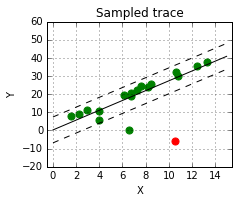

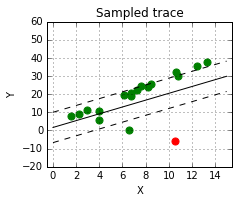

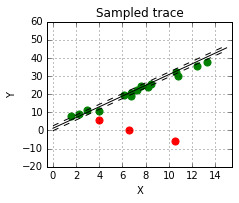

In [38]:
for inf_prog in inf_progs:
    m, s, i, inl_n, outl_n, outliers = get_all_results_time_intervall(
        lin_reg_data_new,
        inf_prog,
        min_t=5.,
        max_t=5.8
    )

    index = np.argmax(m)
    fig, ax = plot_sampled_trace(
        data_xs,
        data_ys,
        outliers[index],
        s[index],
        i[index],
        inl_n[index],
        outl_n[index]
    )
    #ax.legend(loc='upper center', fontsize=7.7, ncol=2)
    if inf_prog == 'sequential_monte_carlo_lbfgs_gibbs':
        print np.asarray(range(1,21))[outliers[index]]

    fig.set_size_inches(3,2.5)
    #ax.set_title(procedures_to_name[inf_prog], y=1.05 )
    ax.set_ylim(-20, 60)
    leg = ax.legend()
    leg.remove()
    #fig.savefig(
    #    '/home/ulli/git_repos/Venture_semantics/figs/linear-regression/traces--%s.pdf' % (inf_prog,),
    #    bbox_inches='tight'
    #)

# Noisy Or

In [15]:
run plotting_config.py

In [16]:
path = 'noisy-or/'
noisy_or_data = get_result_data(path)

250
250


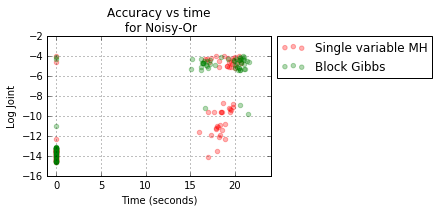

In [41]:
fig, ax = plot_acc_time_cloud(
    noisy_or_data,
    [
        #'resimulation_mh',
        'single_site_mh',
        'block_gibbs',
    ],
    loc='upper left',
    y_jitter=1.5,
    plot_args={'alpha':0.3},
    title_suffix='\n for Noisy-Or'
    
);
fig.set_size_inches(4,2.5)
ax.set_xlim([-1, 24])
#ax.set_ylim(-6, -2)
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.045)}
ax.legend(**outside)
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/noisy-or/time-accuracy.pdf',
#    bbox_inches='tight'
#)

In [42]:
inf_progs = [
        'resimulation_mh',
        'single_site_mh',
        'block_gibbs',
    ]

In [43]:
def get_all_results_time_intervall(result_data, inf_prog, min_t=15, max_t=20):
    def extract_field(field):
        return [
            result[field]
            for result in result_data  if (result['inf-prog-name'] == inf_prog) and\
                (result['timing'] > min_t)  and (result['timing'] < max_t)
        ]
    def extract_parameters(parameter):
        return [
            result['learned-parameters'][parameter]
            for result in result_data  if (result['inf-prog-name'] == inf_prog) and\
                (result['timing'] > min_t)  and (result['timing'] < max_t)
        ]
    return extract_field('timing'), extract_field('measurement'), extract_parameters('latents')

In [44]:
timed_results = {inf_prog:
    get_all_results_time_intervall(noisy_or_data, inf_prog)
    for inf_prog in inf_progs
}

In [45]:
PROBABILITIES_FROM_REJECTION_SAMPLING = [
        0.03750426,
        0.03724874,
        0.9444865,
        0.02869364,
        0.02840974,
        0.02780407
]

In [46]:
def get_marginals(inf_prog, timed_results):
    return np.mean(np.asarray(timed_results[inf_prog][2]), axis=0)

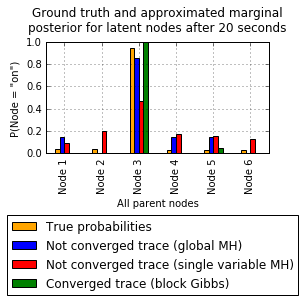

In [47]:
fig, ax = plt.subplots()
df_good = pd.DataFrame({
        'True probabilities':PROBABILITIES_FROM_REJECTION_SAMPLING,
        'Not converged trace (global MH)': get_marginals('resimulation_mh', timed_results),
        'Not converged trace (single variable MH)': get_marginals('single_site_mh', timed_results),
        'Converged trace (block Gibbs)': get_marginals('block_gibbs', timed_results),
})
df_good = df_good[[
    'True probabilities', 
    'Not converged trace (global MH)',
    'Not converged trace (single variable MH)',
    'Converged trace (block Gibbs)',
]]
df_good.plot.bar(ax=ax, color=['orange', 'blue', 'red', 'green',]);
ax.set_title('Ground truth and approximated marginal\nposterior for latent nodes after 20 seconds', y=1.05)
ax.set_ylabel('P(Node = "on")')
ax.set_xlabel('All parent nodes')
labels = ['Node %d' % (i,) for i in range(1, 7)]
ax.set_xticklabels(labels);
ax.grid(True)
ax.legend(bbox_to_anchor=(-0.2, -0.5), loc='upper left')
fig.set_size_inches(4, 2)
#fig.savefig('noisy-or/plots/traces.pdf', bbox_inches='tight',)

In [48]:
df_good

,True probabilities,Not converged trace (global MH),Not converged trace (single variable MH),Converged trace (block Gibbs)
0,0.037504,0.142857,0.088889,0.000000
1,0.037249,0.000000,0.200000,0.000000
2,0.944487,0.857143,0.466667,1.000000
3,0.028694,0.142857,0.177778,0.000000
4,0.028410,0.142857,0.155556,0.045455
5,0.027804,0.000000,0.133333,0.000000


In [49]:
filenames_to_dfcolnames = {
    'ground-truth' : 'True probabilities', 
    #'global-mh' : 'Not converged trace (global MH)',
    'single-var-mh' : 'Not converged trace (single variable MH)',
    'block-gibbs' : 'Converged trace (block Gibbs)',   
}

In [50]:
def define_node_color(node_index, color):
    return '\definecolor{d%dcolor}{rgb}{%.2f, %.2f,  %.2f}\n' %\
        (node_index, color[0], color[1], color[2],)

In [51]:
probs = np.linspace(0, 1, 6)

In [52]:
base_path = '/home/ulli/git_repos/Venture_semantics/figs/noisy-or/'

In [19]:
import matplotlib as mpl

In [20]:
colormap = mpl.cm.plasma

In [55]:
def write_colors(probs, name):
    filename = 'colors-%s.tex' % (name,)
    fh = open(base_path + filename, 'w')
    for i, p in enumerate(probs):
        fh.write(define_node_color(i + 1, colormap(p)))
    fh.close()

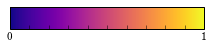

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl


fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])


norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=colormap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')
fig.set_size_inches(3,2)
labels = ['' for item in ax1.get_xticklabels()]
labels[0] = 0
labels[-1] = 1
labels = ['' for item in ax1.get_xticklabels()]
labels[0] = 0
labels[-1] = 1
ax1.set_xticklabels(labels);
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/noisy-or/colorbar.pdf',
#    bbox_inches='tight'
#)

In [57]:
for name in filenames_to_dfcolnames:
    probs = df_good[filenames_to_dfcolnames[name]].values
    #write_colors(probs, name)

In [58]:
filename = 'colors-symptom.tex'
fh = open(base_path + filename, 'w')
#fh.write(define_node_color(100, colormap(.999)))

# GP structure learning

In [24]:
run plotting_config.py

In [25]:
ls gp-structure-learning/results/*.json | wc -l

303


In [26]:
path = 'gp-structure-learning/'
gp_data = get_result_data(path)

108
97


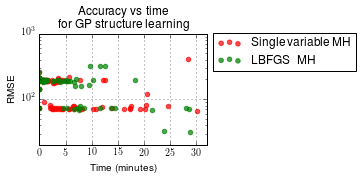

In [27]:
fig, ax = plot_acc_time_cloud(
    gp_data,
    [
        #'resimulation_mh',
        'single_site_mh',
        'lfbgs_mh' # caveat --- typo.
    ],
    loc='upper left',
    plot_args={'alpha':0.7},
    xscale='minutes',
    #x_jitter=3,
    apply_func=np.sqrt,
    title_suffix='\nfor GP structure learning'
);
fig.set_size_inches(8,4)
ax.set_xlim([0, 50])
#ax.set_ylim(-6, -2)
outside={'loc': 'upper left',  'bbox_to_anchor':(1, 1.06)}
fig.set_size_inches(3, 2)
ax.set_yscale("log")
#ax.set_xscale("symlog")
#ax.legend(outside)
ax.set_ylim([20, 1000])
ax.set_xlim([0, 32])
ax.set_ylabel('RMSE')
#ax.legend(bbox_to_anchor=(-0., -0.15), loc='upper left')
ax.legend(**outside)
#fig.savefig(
#    '/home/ulli/git_repos/Venture_semantics/figs/gp-structure-learning/time-accuracy.pdf',
#     bbox_inches='tight'
#)

In [28]:
from pprint import pprint

In [29]:
def get_best_n_results(result_data, inf_prog, n):
    print inf_prog
    print ""
    def extract_field(field):
        return [
            result[field]
            for result in result_data  if (result['inf-prog-name'] == inf_prog)
        ]
    def extract_parameters(parameter):
        return [
            result['learned-parameters'][parameter]
            for result in result_data  if (result['inf-prog-name'] == inf_prog)
        ]
    measurements = extract_field('measurement')
    best_indeces = []
    predictive_samples = []
    vals = []
    for _ in range(n):
        best_index = np.argmin(measurements)
        best_indeces.append(best_index)
        predictive_samples.append(extract_parameters('posterior-predictive')[best_index])
        pprint(extract_parameters('source')[best_index])
        vals.append(measurements[best_index])
        measurements.pop(best_index)
    print ""
    print ""
    return predictive_samples

In [30]:
inf_progs = [
        #'resimulation_mh',
        'single_site_mh',
        'lfbgs_mh' # caveat --- typo.
    ]

In [31]:
n_traces = 2

In [32]:
gp_traces = {inf_prog : get_best_n_results(gp_data, inf_prog, n_traces) for inf_prog in inf_progs}

single_site_mh

[u'*',
 [u'SE', 194.69234784782492],
 [u'+',
  [u'+',
   [u'*',
    [u'SE', 0.01],
    [u'+',
     [u'*',
      [u'*',
       [u'+',
        [u'*', [u'PER', 0.01, 0.01], [u'LIN', 8.817285044968425e-202]],
        [u'C', 311.742581342667]],
       [u'PER', 943.2507641869175, 0.01]],
      [u'PER', 1625.9176167211413, 0.01]],
     [u'+',
      [u'SE', 1757.7695045067624],
      [u'+',
       [u'*',
        [u'+',
         [u'*', [u'SE', 0.01], [u'WN', 694.0285886251443]],
         [u'C', 5.069813486685875e-276]],
        [u'*',
         [u'WN', 0.0],
         [u'+',
          [u'SE', 1215.4278696199724],
          [u'WN', 3411.5916626387298]]]],
       [u'C', 3.255708155053161e-129]]]]],
   [u'LIN', 3621.0374662017234]],
  [u'*',
   [u'+',
    [u'LIN', 1.6965499266819428e-100],
    [u'*', [u'+', [u'SE', 0.01], [u'C', 0.0]], [u'LIN', 0.0]]],
   [u'LIN', 1.3096827084694843e-226]]]]
[u'+',
 [u'WN', 1624.1321004891172],
 [u'*', [u'C', 2995.632080775972], [u'PER', 0.01, 2657.6

In [33]:
assert len(gp_traces['single_site_mh']) == n_traces

In [34]:
run plotting_config.py

In [35]:
x_training = np.loadtxt('gp-structure-learning/airline-data/x_training.csv')
y_training = np.loadtxt('gp-structure-learning/airline-data/y_training.csv')
x_test = np.loadtxt('gp-structure-learning/airline-data/x_test.csv')
y_test = np.loadtxt('gp-structure-learning/airline-data/y_test.csv')

In [36]:
y_const =  280.29861111111109
x_const = 1949.0416666666667

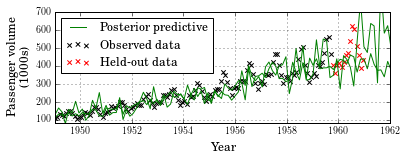

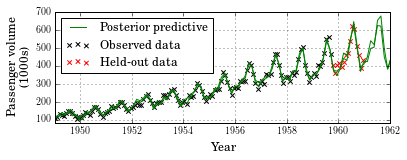

In [43]:
x = np.linspace(0.0001, 13, 100)
for i, inf_prog in enumerate(inf_progs):
    fig, ax = plt.subplots()
    for j in range(n_traces):
        ax.plot(x + x_const, np.asarray(gp_traces[inf_prog][j][0]) + y_const, color='green')
    ax.scatter(x_training + x_const, y_training + y_const, marker='x', color='black', label='Observed data')
    ax.scatter(x_test + x_const, y_test + y_const, marker='x', color='red', label='Held-out data')
    ax.plot([],[], color='green', label = 'Posterior predictive')
    ax.grid(True)
    #ax.set_title(procedures_to_name[inf_prog])
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Passenger volume\n(1000s)', fontsize=12)
    ax.set_xlim(x_const, 1962)
    ax.set_ylim(80, 700)
    fig.set_size_inches(6, 2)
    ax.legend(loc='upper left', fontsize=12)
    if inf_prog == 'lfbgs_mh': # acccomodate for silly typo
        name = 'lbfgs_mh'
    else:
        name = inf_prog
    fig.savefig('/home/ulli/git_repos/Venture_semantics/figs/gp-structure-learning/trace--%s.pdf' %\
                (name,), bbox_inches='tight'
    )